In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
df=pd.read_csv(r"C:\Users\Welcome\Downloads\daily-website-visitors.csv")
df

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
1,2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
4,5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236
...,...,...,...,...,...,...,...,...
2162,2163,Saturday,7,8/15/2020,"2,221","1,696","1,373",323
2163,2164,Sunday,1,8/16/2020,"2,724","2,037","1,686",351
2164,2165,Monday,2,8/17/2020,"3,456","2,638","2,181",457
2165,2166,Tuesday,3,8/18/2020,"3,581","2,683","2,184",499


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Row                2167 non-null   int64 
 1   Day                2167 non-null   object
 2   Day.Of.Week        2167 non-null   int64 
 3   Date               2167 non-null   object
 4   Page.Loads         2167 non-null   object
 5   Unique.Visits      2167 non-null   object
 6   First.Time.Visits  2167 non-null   object
 7   Returning.Visits   2167 non-null   object
dtypes: int64(2), object(6)
memory usage: 135.6+ KB


In [5]:
df.describe()

,Row,Day.Of.Week
count,2167.000000,2167.000000
mean,1084.000000,3.997231
std,625.703338,2.000229
min,1.000000,1.000000
25%,542.500000,2.000000
50%,1084.000000,4.000000
75%,1625.500000,6.000000
max,2167.000000,7.000000


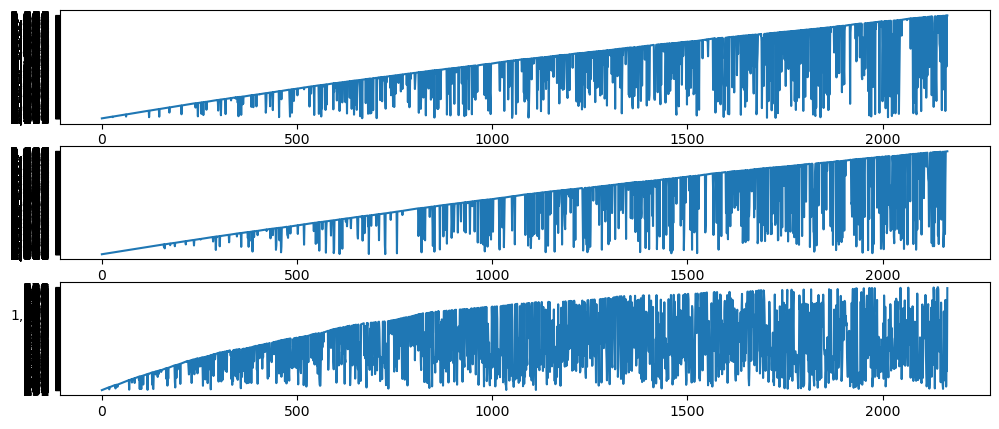

In [6]:
fig, axs = plt.subplots(3, figsize=(12, 5))

axs[0].plot(df['First.Time.Visits'])
axs[1].plot(df['Unique.Visits'])
axs[2].plot(df['Returning.Visits'])
plt.show()

# Preprocessing the data


In [9]:
target_column = df['Returning.Visits']
target_column

0       152
1       231
2       278
3       287
4       236
       ... 
2162    323
2163    351
2164    457
2165    499
2166    267
Name: Returning.Visits, Length: 2167, dtype: object

# Compute Train and Test Data Boundaries

In [12]:
len(target_column)

2167

In [13]:
TEST_DATA_PERCENTAGE = 0.1

TEST_DATA_BOUNDARY_INDEX = int((1 - TEST_DATA_PERCENTAGE) * len(target_column))
print(f"Train data:\tReturning Visits [:{TEST_DATA_BOUNDARY_INDEX}] ({TEST_DATA_BOUNDARY_INDEX + 1})")
print(f"Test data:\tReturning Visits [{TEST_DATA_BOUNDARY_INDEX}:] ({len(target_column) - TEST_DATA_BOUNDARY_INDEX})")
print(f"\nLast target on train data: {target_column[TEST_DATA_BOUNDARY_INDEX]}")

Train data:	Returning Visits [:1950] (1951)
Test data:	Returning Visits [1950:] (217)

Last target on train data: 441


In [14]:
print(f"Train dataset ending values: {target_column[TEST_DATA_BOUNDARY_INDEX - 10: TEST_DATA_BOUNDARY_INDEX].values}")
print(f"Test dataset starting values: {target_column[TEST_DATA_BOUNDARY_INDEX: TEST_DATA_BOUNDARY_INDEX + 10].values}")

Train dataset ending values: ['429' '423' '442' '464' '372' '253' '277' '515' '434' '394']
Test dataset starting values: ['441' '413' '246' '314' '443' '484' '473' '490' '353' '249']


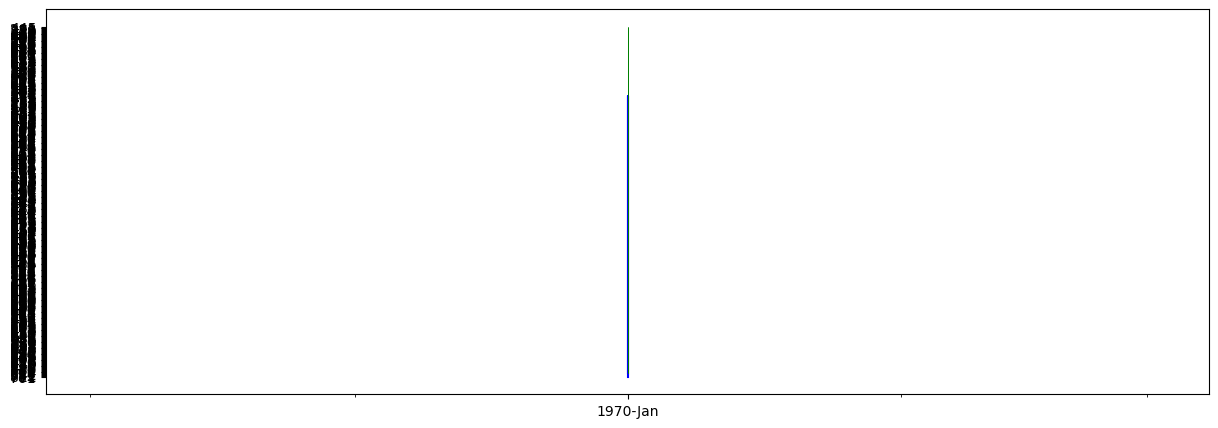

In [17]:
import numpy as np 
import matplotlib.dates as mdates

def plot_time_series(predictions = None, start_index=1500):
    timesteps = pd.to_datetime(target_column.index)
    
    fig,ax = plt.subplots(1,figsize=(15,5))
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
    
    # Plot train dataset
    plt.plot(timesteps[start_index:TEST_DATA_BOUNDARY_INDEX], target_column[start_index:TEST_DATA_BOUNDARY_INDEX],
            color='blue')
    # Plot test dataset
    plt.plot(timesteps[TEST_DATA_BOUNDARY_INDEX:], target_column[TEST_DATA_BOUNDARY_INDEX:],
             color='green', linewidth=0.4)
    
    if predictions is not None:
        pred_timesteps = timesteps[TEST_DATA_BOUNDARY_INDEX:]
        plt.plot(pred_timesteps, predictions, linewidth=0.4, color='red')
        plt.scatter(pred_timesteps, predictions, s=0.4, color='red')

        
plot_time_series()

In [19]:
unbatched_train_dataset = df[:TEST_DATA_BOUNDARY_INDEX + 1].copy()
unbatched_train_dataset

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
1,2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
4,5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236
...,...,...,...,...,...,...,...,...
1946,1947,Sunday,1,1/12/2020,"2,762","2,238","1,961",277
1947,1948,Monday,2,1/13/2020,"4,298","3,242","2,727",515
1948,1949,Tuesday,3,1/14/2020,"3,838","2,884","2,450",434
1949,1950,Wednesday,4,1/15/2020,"3,754","2,864","2,470",394
